# Boston House Prices 예측

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston # 보스턴 집값 예측 데이터 셋
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# EDA(Exploratory Data Analysis) 탐색적 데이터 분석

In [22]:
boston = load_boston() # 데이터 셋 불러오기
y_target = pd.Series(boston.target).to_frame('MEDV') # 종속 변수

C:\Users\shk97\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [23]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names) # row data 데이터프레임화 
df = pd.concat([df, y_target], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Boston House Price Attributes
+ CRIM : 자치시(town) 별 1인당 범죄율 
+ ZN : 25,000 평방피트를 초과하는 거주지역의 비율
+ INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
+ CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
+ NOX : 10ppm당 농축 일산화질소
+ RM : 주택 1가구당 평균 방의 개수
+ AGE : 1940년 이전에 건축된 소유주택의 비율
+ DIS : 5개의 보스턴 직업센터까지의 접근성 지수
+ RAD : 방사형 도로까지의 접근성 지수
+ TAX : 10,000 달러 당 재산세율
+ PTRATIO : 자치시(town)별 학생/교사 비율
+ B : 1000(Bk-0.63)^2, 여기서 bk는 자치시별 흑인의 비율을 말함
+ LSTAT : 모집단의 하위계층의 비율(%)
+ MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

# 데이터 개수

In [24]:
df.shape

(506, 14)

# 데이터 정보

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


C:\Users\shk97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shk97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shk97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

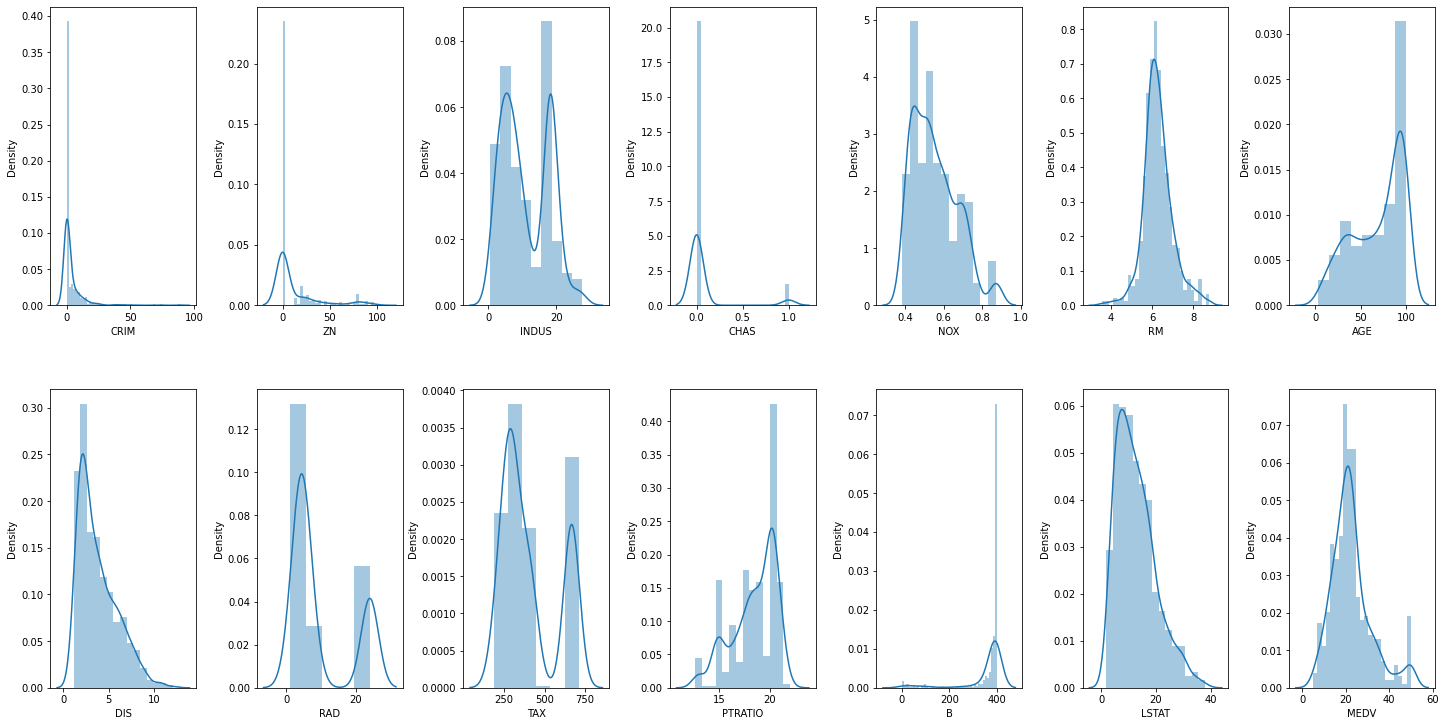

In [26]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# 데이터 고유 개수

In [27]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

<h1> 요약 통계량

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 결측치

In [29]:
null_df = df.isnull().sum().to_frame('Null')
null_df

,Null
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# 이상치 및 결측치 확인
+ fence_low = Q1 - (1.5 * IQR) → 최소보다 적은 이상치
+ fence_high = Q1 + (1.5 * IQR) → 최대보다 큰 이상치

In [30]:
def detection_outlier(df):
    cols = list(df) # 데이터프레임 열 이름 저장
    outliers = pd.DataFrame(columns=['Features', 'Number of Outlier'])
    for column in cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        fence_low = q1 - (1.5 * IQR)
        fence_high = q3 + (1.5 * IQR)
        outliers= outliers.append({'Features' : column, 'Number of Outlier' : df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]}, ignore_index = True)
    return outliers

outlier_df = detection_outlier(df)
outlier_df

,Features,Number of Outlier
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


<h1> 이상치 시각화

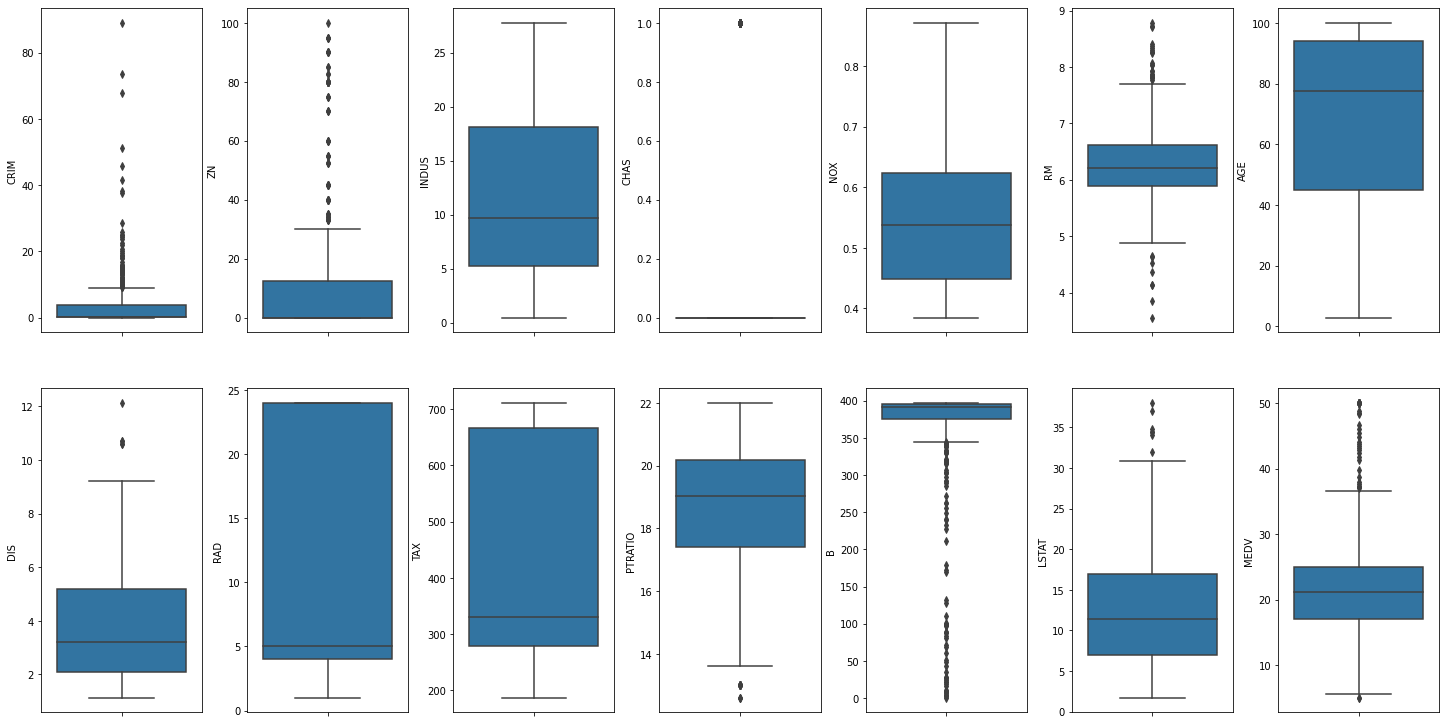

In [31]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h1> 이상치 제거 : winsorize 사용
<h2> CRIM, ZN, B의 경우 이상치가 존재한다고 나와있지만 해당 데이터는 이상치가 아닌 데이터 셋에 존재하는 대다수 값을 의미함

 + 변수의 개수를 유지하면서 극단값들을 정상 범위안의 데이터로 대체하는 방법
 + 예를 들어 limits = [0.05, 0.1]일 경우 하위 5% 미만 데이터를 5% 데이터로 대체하고, 상위 10% 초과 데이터를 10% 데이터로 대체
 + inclusive = (True, True) → 각 측면에서 마스킹되는 데이터 수가 잘리거나(True) 반올림(False)되어야 하는지 여부를 나타내는 선택적 튜플
 + 참고 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [35]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)
detection_outlier(df)

,Features,Number of Outlier
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,0
4,NOX,0
5,RM,0
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


C:\Users\shk97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

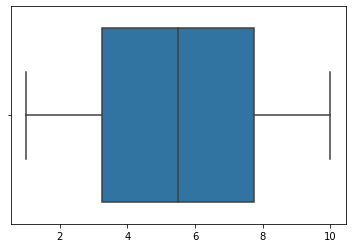

In [19]:
sns.boxplot(a)

<h1> 상관계수

In [1768]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.343551,0.671353,NaN,0.712564,-0.240228,0.509257,-0.577344,0.910197,0.860613,0.430118,-0.508620,0.600943,-0.544765
ZN,-0.343551,1.000000,-0.583855,NaN,-0.580143,0.379292,-0.605075,0.656799,-0.333161,-0.360206,-0.425441,0.204612,-0.475579,0.438349
INDUS,0.671353,-0.583855,1.000000,NaN,0.818685,-0.404474,0.659457,-0.742924,0.657486,0.764971,0.372088,-0.397072,0.636486,-0.580009
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.712564,-0.580143,0.818685,NaN,1.000000,-0.309889,0.771225,-0.843007,0.693147,0.742596,0.310601,-0.404225,0.638848,-0.542763
RM,-0.240228,0.379292,-0.404474,NaN,-0.309889,1.000000,-0.268048,0.245427,-0.181222,-0.268772,-0.316434,0.116949,-0.624149,0.687196
AGE,0.509257,-0.605075,0.659457,NaN,0.771225,-0.268048,1.000000,-0.778291,0.456294,0.515061,0.285067,-0.283587,0.639940,-0.477844
DIS,-0.577344,0.656799,-0.742924,NaN,-0.843007,0.245427,-0.778291,1.000000,-0.525309,-0.587061,-0.287226,0.326568,-0.537644,0.367951
RAD,0.910197,-0.333161,0.657486,NaN,0.693147,-0.181222,0.456294,-0.525309,1.000000,0.918764,0.487934,-0.442638,0.504931,-0.457198
TAX,0.860613,-0.360206,0.764971,NaN,0.742596,-0.268772,0.515061,-0.587061,0.918764,1.000000,0.477103,-0.447453,0.569311,-0.546597


<h1> 상관계수 시각화

<AxesSubplot:>

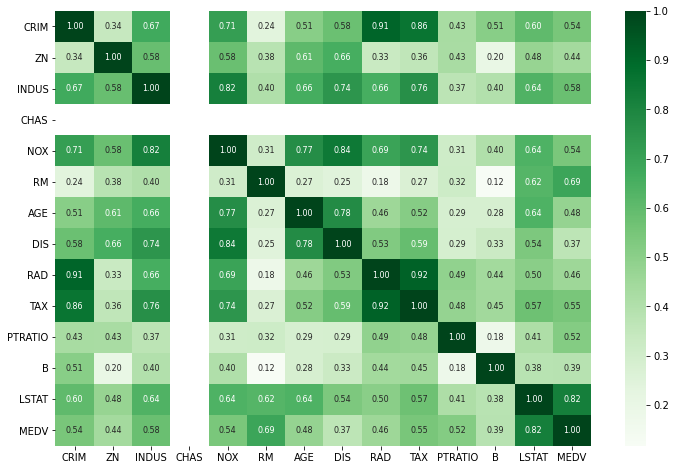

In [1769]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr().abs(), cbar=True, annot = True, fmt = '.2f', annot_kws = {'size':8}, cmap = 'Greens')

<h1> 다중공선성 확인

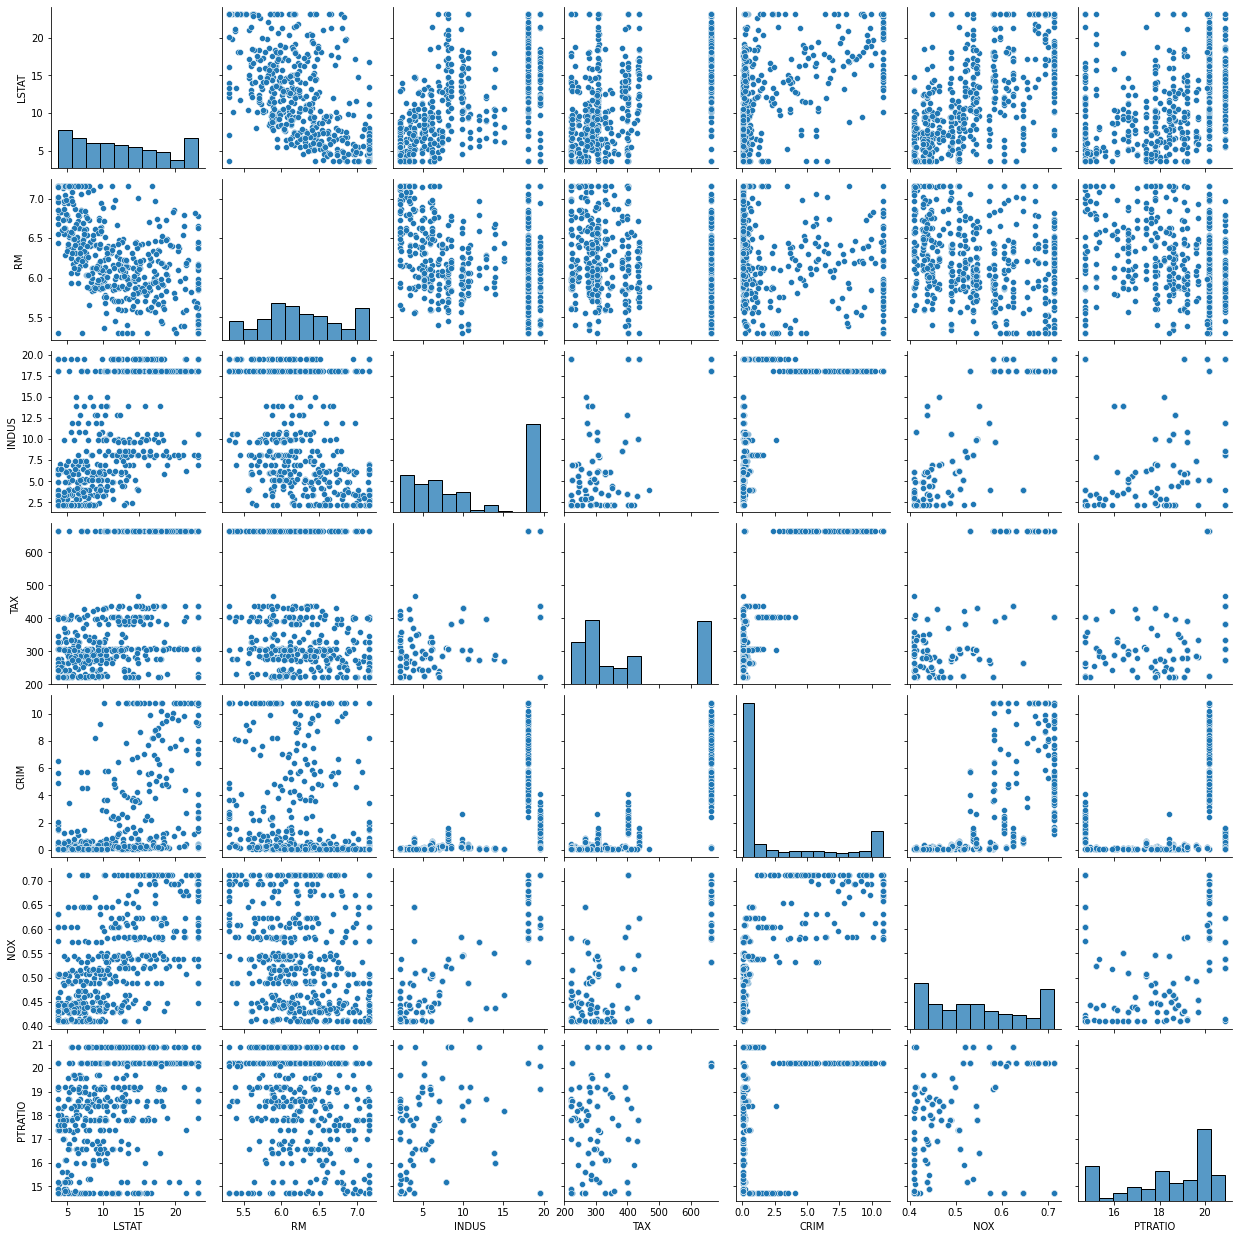

In [1770]:
multicollinearity_confirm = df[['LSTAT', 'RM', 'INDUS', 'TAX', 'CRIM', 'NOX', 'PTRATIO']]
sns.pairplot(multicollinearity_confirm)

<h1> 다중공선성 heatmap

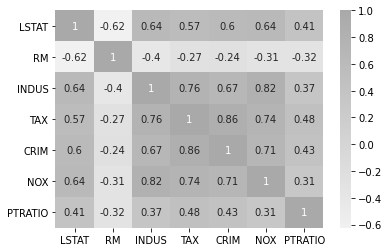

In [1771]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(multicollinearity_confirm.corr(), annot=True, cmap=cmap)
plt.show()

# 상관계수(내림차순)

In [1772]:
df_corr = df.corr().loc[:'LSTAT', 'MEDV'].abs().sort_values(ascending = False)
df_corr

LSTAT      0.822255
RM         0.687196
INDUS      0.580009
TAX        0.546597
CRIM       0.544765
NOX        0.542763
PTRATIO    0.517919
AGE        0.477844
RAD        0.457198
ZN         0.438349
B          0.385808
DIS        0.367951
CHAS            NaN
Name: MEDV, dtype: float64

# 상관계수 최빈 7개에 대한 regplot

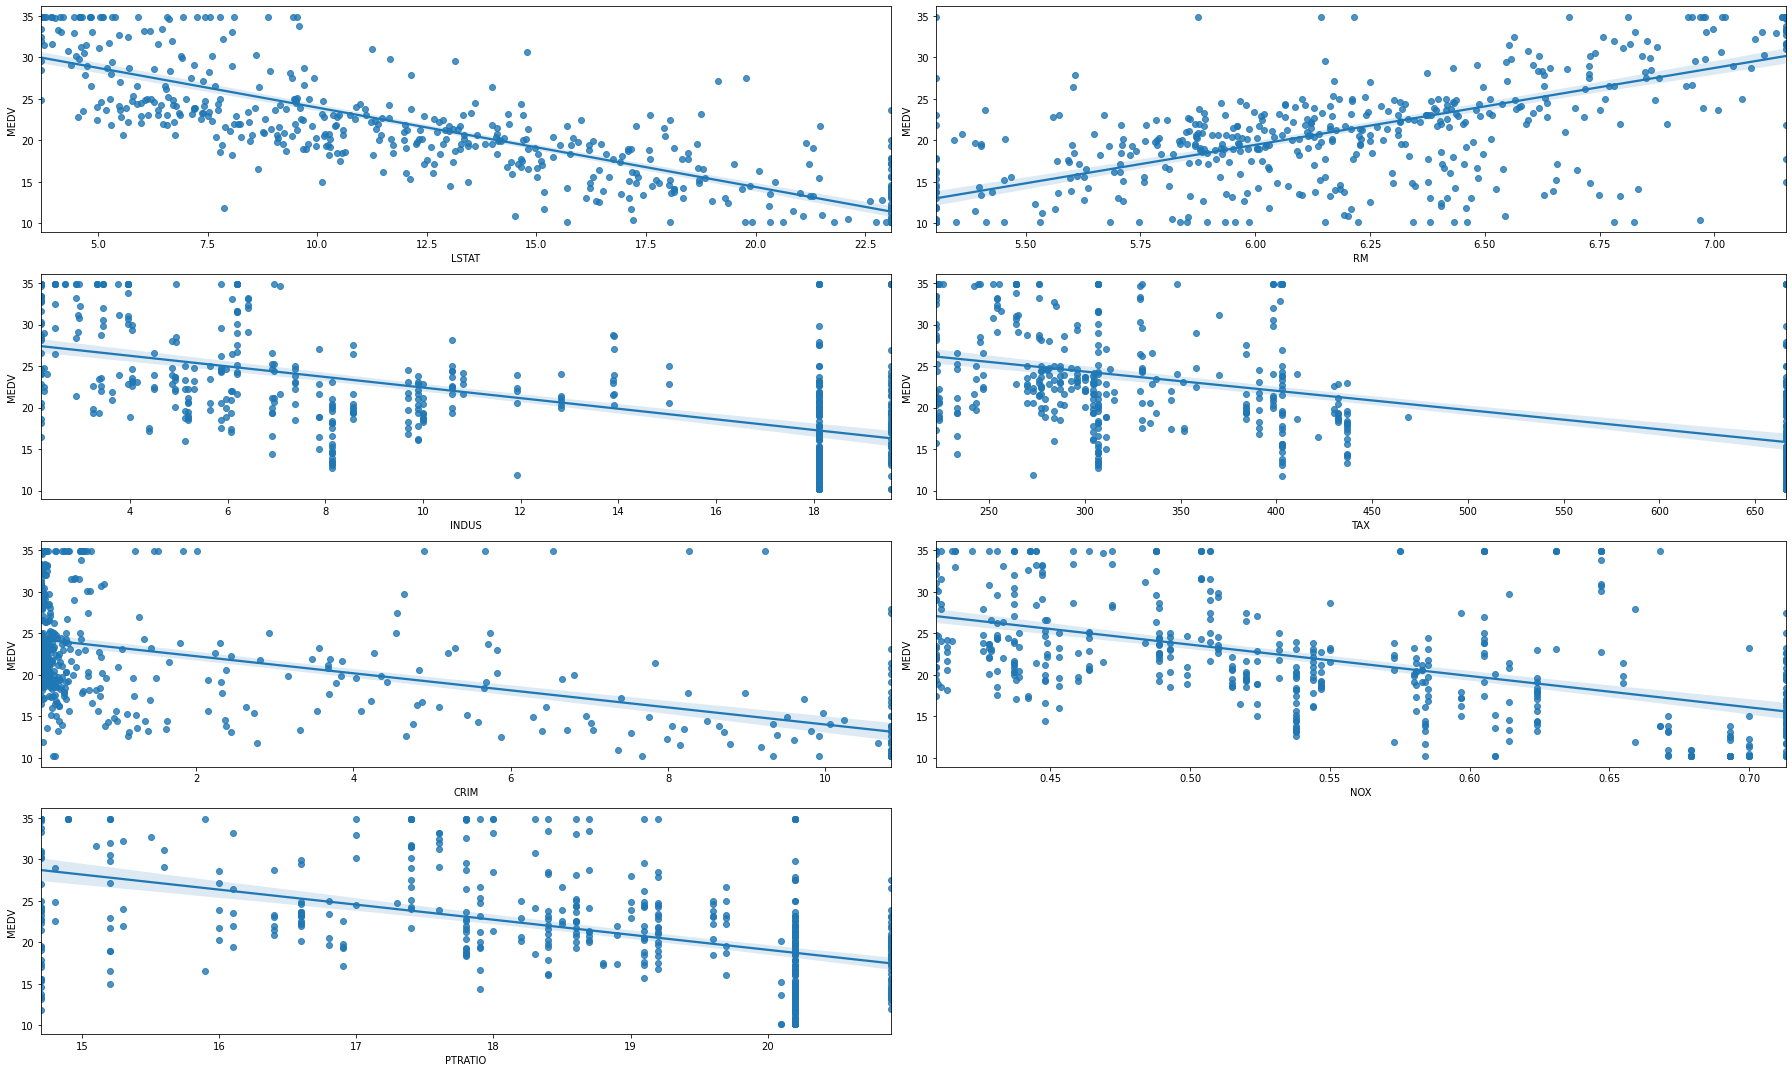

In [1773]:
high_6_label = ['LSTAT', 'RM', 'INDUS', 'TAX', 'CRIM', 'NOX', 'PTRATIO']


plt.figure(figsize=(25,15))
for idx, col in enumerate(high_6_label):
  ax1=plt.subplot(4, 2, idx+1)
  sns.regplot(x = high_6_label[idx], y = df['MEDV'], data = df, ax = ax1)
plt.tight_layout()
plt.show()

# 선형회귀(Linear Regression)

In [1848]:
x_data = df[['LSTAT', 'RM', 'INDUS', 'TAX', 'CRIM', 'NOX', 'PTRATIO']]
y_data = df['MEDV']

In [1849]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3) # 훈련 셋(7): 테스트 셋(3)

# 스케일러 사용 : MinMaxScaler

In [1850]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [1851]:
mlr = LinearRegression()
mlr.fit(x_train_scaled, y_train)

LinearRegression()

In [1852]:
print('y절편 : ', np.round(mlr.intercept_, 2))
print('상관계수 : ', np.round(mlr.coef_, 2))

y절편 :  26.15
상관계수 :  [-12.27   7.63   0.48  -2.17   0.52   0.25  -4.13]


# test set에 대한 성능

In [1853]:
mlr_y_pred = mlr.predict(x_test_scaled)
print('R^2:', round(metrics.r2_score(y_test, mlr_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_test, mlr_y_pred))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1), 2))
print('MAE:', round(metrics.mean_absolute_error(y_test, mlr_y_pred), 2))
print('MSE:',round(metrics.mean_squared_error(y_test, mlr_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_test, mlr_y_pred)), 2))

R^2: 0.7
Adjusted R^2: 0.69
MAE: 2.75
MSE: 13.49
RMSE: 3.67


# train set에 대한 성능

In [1854]:
mlr_y_pred = mlr.predict(x_train_scaled)
print('R^2:', round(metrics.r2_score(y_train, mlr_y_pred), 2))
print('Adjusted R^2:', round(1 - (1-metrics.r2_score(y_train, mlr_y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1), 2))
print('MAE:', round(metrics.mean_absolute_error(y_train, mlr_y_pred), 2))
print('MSE:', round(metrics.mean_squared_error(y_train, mlr_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_train, mlr_y_pred)), 2))

R^2: 0.78
Adjusted R^2: 0.78
MAE: 2.65
MSE: 11.28
RMSE: 3.36


<h1><실측 값과 예측 값 산점도 그래프>

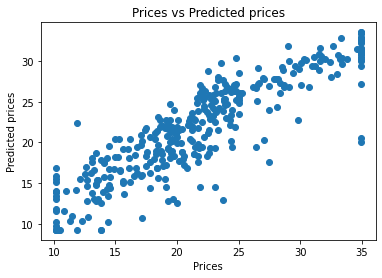

In [1839]:
plt.scatter(y_train, mlr_y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# RandomForest Regressor - GridSearchCV를 통해 최적의 하이퍼파라미터 추정

In [1934]:
params = {
    'n_estimators' : [30, 50, 100],
    'max_depth' : [4, 8, 10],
    'min_samples_leaf' : [4, 8, 10],
    'min_samples_split' : [4, 8, 10],
    'max_features' : [1, 2, 3, 4]
}

rf = RandomForestRegressor(n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 5, n_jobs = -1) 
# n_jobs : 디폴트 값은 1인데 이 값을 증가시키면 내부적으로 멀티 프로세스를 사용하여 그리드서치를 수행한다. 만약 CPU 코어의 수가 충분하다면 n_jobs를 늘릴 수록 속도가 증가한다.
# cv : 교차 검증 생성기
grid_cv.fit(x_train_scaled, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 30}
최적 예측 정확도: 0.8356


In [1935]:
rf_model = RandomForestRegressor(max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators = 30)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=10, max_features=2, min_samples_leaf=4,
                      min_samples_split=4, n_estimators=30)

<h1> test_set에 대한 성능

In [1936]:
rf_y_pred = rf_model.predict(x_test_scaled)
print('R^2:', round(metrics.r2_score(y_test, rf_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_test, rf_y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1), 2))
print('MAE:',round(metrics.mean_absolute_error(y_test, rf_y_pred), 2))
print('MSE:',round(metrics.mean_squared_error(y_test, rf_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)), 2))

R^2: 0.84
Adjusted R^2: 0.83
MAE: 1.95
MSE: 7.21
RMSE: 2.68


<h1> train_set에 대한 성능

In [1937]:
rf_y_pred = rf_model.predict(x_train_scaled)
print('R^2:', round(metrics.r2_score(y_train, rf_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_train, rf_y_pred))*(len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1), 2))
print('MAE:', round(metrics.mean_absolute_error(y_train, rf_y_pred), 2))
print('MSE:', round(metrics.mean_squared_error(y_train, rf_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_train, rf_y_pred)), 2))

R^2: 0.92
Adjusted R^2: 0.91
MAE: 1.45
MSE: 4.33
RMSE: 2.08


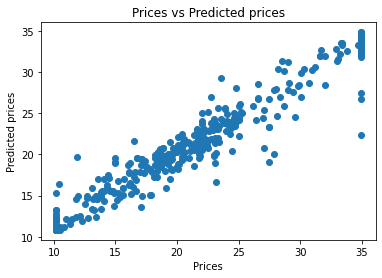

In [1938]:
plt.scatter(y_train, rf_y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

<h1> 변수 중요도 시각화 그래프

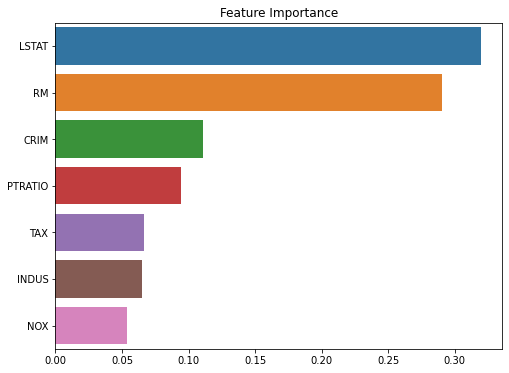

In [1940]:
ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


# 라쏘 회귀(Lasso Regression)
+ 라쏘 회귀는 기존 선형 회귀에 추가적인 제약을 주는 방식으로 과적합을 방지한다.
+ MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 동시에, 가중치들의 절댓값의 합이 최소가 되게 한다.(즉 모든 원소가 0이 되거나 0에 가깝게 되도록 해야 한다)
+ L1-norm

In [1899]:
lasso = Lasso(alpha = 0.1, max_iter=100000).fit(x_train_scaled, y_train)

In [1900]:
lasso_y_pred = lasso.predict(x_test_scaled)

print('R^2:',round(metrics.r2_score(y_test, lasso_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_test, lasso_y_pred))*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1), 2))
print('MAE:',round(metrics.mean_absolute_error(y_test, lasso_y_pred), 2))
print('MSE:',round(metrics.mean_squared_error(y_test, lasso_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_test, lasso_y_pred)), 2))

R^2: 0.72
Adjusted R^2: 0.7
MAE: 2.7
MSE: 12.84
RMSE: 3.58


In [1901]:
lasso_y_pred = lasso.predict(x_train_scaled)

print('R^2:',round(metrics.r2_score(y_train, lasso_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_train, lasso_y_pred))*(len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1), 2))
print('MAE:',round(metrics.mean_absolute_error(y_train, lasso_y_pred), 2))
print('MSE:',round(metrics.mean_squared_error(y_train, lasso_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_train, lasso_y_pred)), 2))

R^2: 0.78
Adjusted R^2: 0.77
MAE: 2.68
MSE: 11.48
RMSE: 3.39


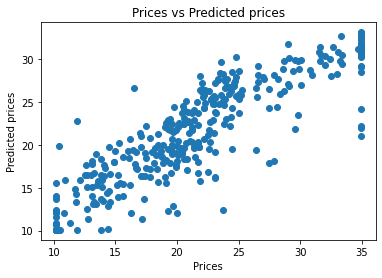

In [1811]:
plt.scatter(y_train, lasso_y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# 릿지 회귀(Ridge Regression)
+ 랏쏘 회귀와 매우 유사하지만 패널티 항에 L1-norm 대신에 L2-norm 패널티를 가진다.
+ L2-norm
+ 라쏘는 가중치들이 0이 되지만, 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다
+ 일부분만 중요하다면 라쏘가, 특성의 중요도가 전체적으로 비슷하다면 릿지가 좀 더 괜찮은 모델이다.
+ 따라서 해당 데이터 셋에서는 LSTAT, RM이 다른 변수에 비해 상관성이 높게 나왔으므로, 랏쏘 회귀가 더 적합하다.

In [1931]:
ridge = Ridge(alpha = 0.1).fit(x_train_scaled, y_train) # default alpha = 1

In [1932]:
ridge_y_pred = ridge.predict(x_test_scaled)

print('R^2:',round(metrics.r2_score(y_test, ridge_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_test, ridge_y_pred))*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1), 2))
print('MAE:',round(metrics.mean_absolute_error(y_test, ridge_y_pred), 2))
print('MSE:',round(metrics.mean_squared_error(y_test, ridge_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_test, ridge_y_pred)), 2))

R^2: 0.7
Adjusted R^2: 0.69
MAE: 2.74
MSE: 13.45
RMSE: 3.67


In [1933]:
ridge_y_pred = ridge.predict(x_train_scaled)

print('R^2:',round(metrics.r2_score(y_train, ridge_y_pred), 2))
print('Adjusted R^2:',round(1 - (1-metrics.r2_score(y_train, ridge_y_pred))*(len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1), 2))
print('MAE:',round(metrics.mean_absolute_error(y_train, ridge_y_pred), 2))
print('MSE:',round(metrics.mean_squared_error(y_train, ridge_y_pred), 2))
print('RMSE:',round(np.sqrt(metrics.mean_squared_error(y_train, ridge_y_pred)), 2))

R^2: 0.78
Adjusted R^2: 0.78
MAE: 2.65
MSE: 11.28
RMSE: 3.36


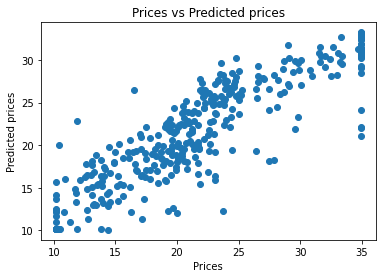

In [1824]:
plt.scatter(y_train, ridge_y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()